# Project Markup

In [1]:
# Dependencies
#from config import (census_key, gkey)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
import json

#from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
baby_name_original = pd.read_csv(
    "../Data/StateNames.csv", dtype="object", encoding="utf-8")
#display result
baby_name_original.head()

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7


In [3]:
baby_name_original["Count"] = baby_name_original.Count.astype(float)
baby_name_original['date_conv'] = pd.to_datetime(baby_name_original.Year)

In [4]:
baby_name_original.dtypes

Id                   object
Name                 object
Year                 object
Gender               object
State                object
Count               float64
date_conv    datetime64[ns]
dtype: object

In [5]:
# Females in the Dataset
(baby_name_original.Gender=='F').mean()

0.5961681329423265

In [6]:
# Males in the Dataset
(baby_name_original.Gender=='M').mean()

0.4038318670576735

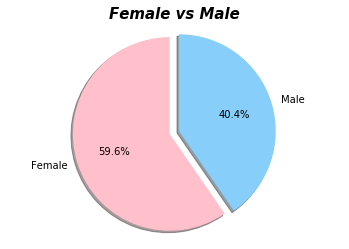

In [7]:
# Plotting Pie-Chart

distribution = baby_name_original.groupby(['Gender'])['Id'].nunique()
gender_demographic = list(distribution.index)
labels = "Female","Male"
colors = "Pink","lightskyblue"
explode = (0,0.1)
plt.pie(distribution,labels=labels,explode=explode,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis("equal")
plt.title("Female vs Male",fontsize=15, fontweight = 'heavy', style= 'italic')
plt.savefig("../Output/Female vs Male.png")
plt.show()

### Observation: There are approximately 60 % Female names and approximately 40% males name in the dataset.

In [8]:
# To get the counts

baby_name_original.groupby("Gender").agg({'Count':'sum'})/baby_name_original.Count.sum()

,Count
Gender,
F,0.510717
M,0.489283


### Observation : Count is the number of times the names have been used. From the above, we can inferred that the female names are more used over male names.

In [9]:
# Group the dataset by name
names = baby_name_original.groupby("Name")

In [10]:
# Different names in the database
baby_name_original.Name.nunique()

20652

### Observation: There are 20,652 unique names in the dataset.

In [11]:
# Name with the most occurances
most_occurances = names.Count.sum().sort_values(ascending=False)
most_occurances

Name
Michael     726834.0
James       693487.0
Robert      676076.0
John        671498.0
David       615056.0
              ...   
Jayren           5.0
Jayvien          5.0
Jazalyn          5.0
Jaziyah          5.0
Kashmere         5.0
Name: Count, Length: 20652, dtype: float64

### Observation: We have removed the name with the most occurance and Michael is the most used name in the past 100 years.

In [12]:
# Least occurances
least_occurances = (names.Count.sum()== 5).sum()
least_occurances

2975

### Observation: There are 2975 names present in the database that has least occurance. 

In [13]:
# Top 10 Males Name
baby_name_male = baby_name_original[baby_name_original["Gender"] == "M"]
baby_name_male = baby_name_male[["Name", "Count"]]
baby_name_male = baby_name_male.groupby("Name")
baby_name_male = baby_name_male.sum()
baby_name_male = baby_name_male.sort_values("Count", ascending=False)
baby_name_male.head(10)

,Count
Name,
Michael,722651.0
James,690430.0
Robert,673607.0
John,669089.0
David,613046.0
William,514861.0
Richard,381858.0
Christopher,375905.0
Daniel,370072.0


In [14]:
# Top 10 Female Names

baby_name_female = baby_name_original[baby_name_original["Gender"] == "F"]
baby_name_female= baby_name_female[["Name", "Count"]]
baby_name_female = baby_name_female.groupby("Name")
baby_name_female = baby_name_female.sum()
baby_name_female = baby_name_female.sort_values("Count", ascending=False)
baby_name_female.head(10)

,Count
Name,
Mary,521196.0
Jennifer,329904.0
Elizabeth,277458.0
Patricia,257835.0
Jessica,256003.0
Linda,250265.0
Barbara,217539.0
Sarah,201562.0
Ashley,196703.0


### Observation: We removed the top 10 male names over the past 100 years and the name Michael is taking the first position. Similarly, for the females Mary is at the number 1 position.

In [15]:
# For creating tuples
males = [(male,'M') for male in list(baby_name_male.head(8).index)]
females = [(female,'F') for female in list(baby_name_female.head(8).index)]

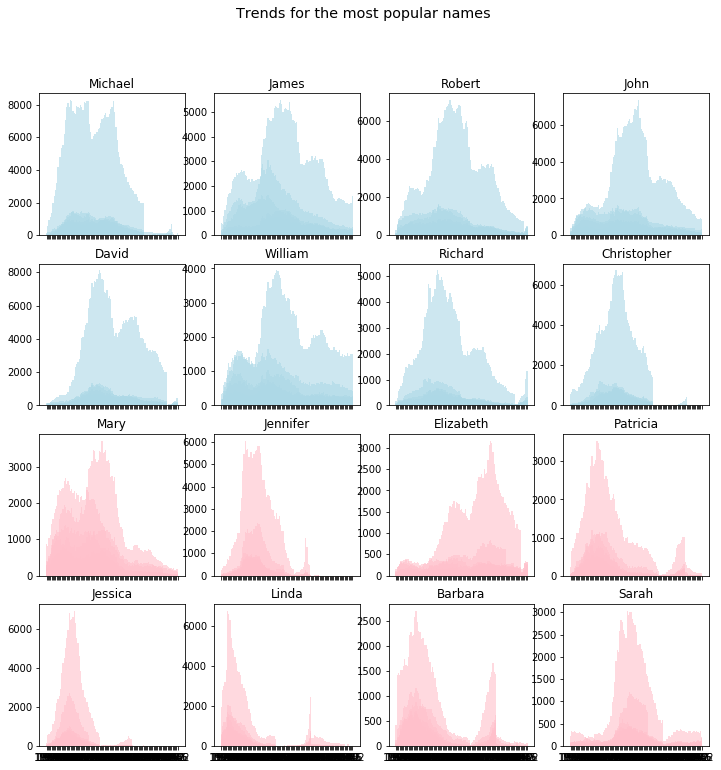

In [16]:
most_popular = baby_name_original

def plot(ax, name, gender):
    data = most_popular.loc[(most_popular.Name==name)&(most_popular.Gender==gender)]
    ax.bar(data.Year, data.Count, width = 1, alpha=0.6,
           color = 'pink' if gender=='F' else 'lightblue')
    ax.set_title(name)
    return ax

fig, ax = plt.subplots(4,4, figsize=(12,12), sharex=True)
ax = ax.flatten()
years = list(range(1910, 2021,20))
plt.xticks(years)
for a, (name, gender) in zip(ax, males+females):
    plot(a, name, gender)
fig.suptitle('Trends for the most popular names',fontsize='x-large');
plt.savefig("../Output/Popular_Names.png")

In [17]:
# Median Name occurance
median_name = names.Count.sum().median()
print("The median of the name occurance is:" +str(median_name))

The median of the name occurance is:46.0


In [18]:
# Median Names
count_name = names.Count.sum()
count_name[count_name==46]

Name
Albertina    46.0
Analuisa     46.0
Aspyn        46.0
Audel        46.0
Bebe         46.0
             ... 
Yahira       46.0
Yamilett     46.0
Yang         46.0
Yanni        46.0
Zoltan       46.0
Name: Count, Length: 66, dtype: float64

### Observation:

In [19]:
# Standard Deviation of Names
names_std = count_name.std()
print("The standard deviation for name is:" +str(names_std))

The standard deviation for name is:18438.14728191366


In [20]:
#Summary on Names
count_name.describe()

count     20652.000000
mean       2637.657757
std       18438.147282
min           5.000000
25%          11.000000
50%          46.000000
75%         287.000000
max      726834.000000
Name: Count, dtype: float64

In [21]:
baby_name_original["Name Length"]= baby_name_original["Name"].str.len()
baby_name_original

,Id,Name,Year,Gender,State,Count,date_conv,Name Length
0,1,Mary,1910,F,AK,14.0,1910-01-01,4
1,2,Annie,1910,F,AK,12.0,1910-01-01,5
2,3,Anna,1910,F,AK,10.0,1910-01-01,4
3,4,Margaret,1910,F,AK,8.0,1910-01-01,8
4,5,Helen,1910,F,AK,7.0,1910-01-01,5
...,...,...,...,...,...,...,...,...
1048570,1048571,Kyrsten,2002,F,FL,6.0,2002-01-01,7
1048571,1048572,Lacy,2002,F,FL,6.0,2002-01-01,4
1048572,1048573,Laurie,2002,F,FL,6.0,2002-01-01,6
1048573,1048574,Lee,2002,F,FL,6.0,2002-01-01,3


### We wanted to find whether short names or longer names are used over a time so we removed the length (number of characters) in the names

In [22]:
baby_name_original['Year'] = baby_name_original['Year'].astype(int)

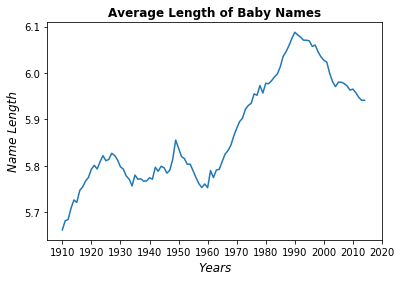

In [23]:
plt.plot(baby_name_original.groupby(['Year']).agg({'Name Length':np.mean}))
years = list(range(1910, 2021,10))
plt.xticks(years)
plt.xlabel("Years",fontsize=12,style='italic')
plt.ylabel("Name Length", fontsize=12,style='italic')
plt.title("Average Length of Baby Names",fontsize=12,fontweight='bold',style='normal')
plt.savefig("../Output/NameLength.png")
plt.show()

### Observation : The average length of baby names has increased over the century , with its peak being in the 90's.

In [24]:
both_df = baby_name_original.groupby(['Year','Gender'])['Name Length'].mean()
both_df = both_df.unstack()

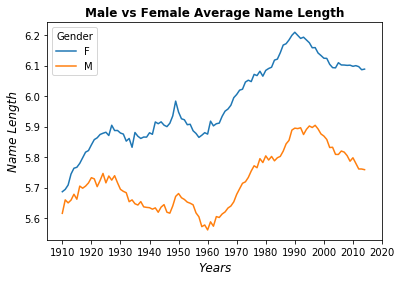

In [25]:
both_df.plot(kind = 'line')
years = list(range(1910, 2021,10))
plt.xticks(years)
plt.xlabel("Years",fontsize=12,style='italic')
plt.ylabel("Name Length",fontsize=12,style='italic')
plt.title("Male vs Female Average Name Length",fontsize=12,fontweight='bold',style='normal')
plt.savefig("../Output/Male vs Female Name Length.png")
plt.show()

### Observation: The average length of baby names for both male and female has increased with female having  more longer names as compared to males. We can see that post 1990, the trend for longer names is reducing. So, after this observation, we can interpret that there will be a trend in shorter name.

In [26]:
# Most popular Names Length
popular_name_length = baby_name_original.groupby(['Name','Name Length']).size().reset_index(name="Count").sort_values(by="Count",ascending=False).drop_duplicates("Name", keep="first")
print("The most popular Name Lengths are:")
popular_name_length.head(20)
# These are the popular names who lengths are as follows

The most popular Name Lengths are:


,Name,Name Length,Count
12020,Leslie,6,1233
8574,James,5,1217
11863,Lee,3,1208
9517,John,4,1189
13397,Mary,4,1184
16265,Robert,6,1164
9316,Jessie,6,1158
13877,Michael,7,1127
19847,William,7,1108
5955,Elizabeth,9,1073


### Observation: According to the above analysis, the average

In [27]:
baby_name_new = baby_name_original.copy()
baby_name_new.set_index('Id', inplace=True)
#baby_name_new["Year"] = baby_name_new["Year"].astype(int)
baby_name_new['Decade'] = ((baby_name_new['Year']//10)*10)
#baby_name_new = baby_name_new.reset_index(drop=True)
baby_name_new

,Name,Year,Gender,State,Count,date_conv,Name Length,Decade
Id,,,,,,,,
1,Mary,1910,F,AK,14.0,1910-01-01,4,1910
2,Annie,1910,F,AK,12.0,1910-01-01,5,1910
3,Anna,1910,F,AK,10.0,1910-01-01,4,1910
4,Margaret,1910,F,AK,8.0,1910-01-01,8,1910
5,Helen,1910,F,AK,7.0,1910-01-01,5,1910
...,...,...,...,...,...,...,...,...
1048571,Kyrsten,2002,F,FL,6.0,2002-01-01,7,2000
1048572,Lacy,2002,F,FL,6.0,2002-01-01,4,2000
1048573,Laurie,2002,F,FL,6.0,2002-01-01,6,2000


In [28]:
# Group the dataset by decade
decade = baby_name_new.groupby("Decade")

In [29]:
# Average per Decade 
average_decade = decade['Name Length'].mean()
print("The Average per decade is:")
average_decade

The Average per decade is:


Decade
1910    5.732300
1920    5.810657
1930    5.775487
1940    5.798417
1950    5.789889
1960    5.807671
1970    5.930810
1980    6.017974
1990    6.065289
2000    5.987623
2010    5.950541
Name: Name Length, dtype: float64

In [30]:
# Standard deviation of decade
std_decade= decade['Name Length'].std()
print("The Standard Deviation of decade on Name length is:")
std_decade

The Standard Deviation of decade on Name length is:


Decade
1910    1.459526
1920    1.467503
1930    1.462345
1940    1.472677
1950    1.462622
1960    1.452873
1970    1.435261
1980    1.458566
1990    1.439460
2000    1.402543
2010    1.395767
Name: Name Length, dtype: float64

In [31]:
# The average Name Length for 100 years
gender_name_length = baby_name_original["Name Length"]
average_name = np.average(gender_name_length)
print(" The average name length is:" + str(average_name))

 The average name length is:5.917804639629974


In [32]:
mean_series = baby_name_new.groupby(['Year'])['Name Length'].mean()
max_index = mean_series.argmax()
print("Maximum average value is %f"%mean_series.iloc[max_index])

# Year with maximum average length
print("Year with maximum length is %d"%mean_series.index[max_index])

#Top ten values in 1990
baby_name_new[baby_name_new['Year'] == 1990]

Maximum average value is 6.087786
Year with maximum length is 1990


,Name,Year,Gender,State,Count,date_conv,Name Length,Decade
Id,,,,,,,,
8496,Jessica,1990,F,AK,112.0,1990-01-01,7,1990
8497,Ashley,1990,F,AK,96.0,1990-01-01,6,1990
8498,Amanda,1990,F,AK,92.0,1990-01-01,6,1990
8499,Brittany,1990,F,AK,75.0,1990-01-01,8,1990
8500,Samantha,1990,F,AK,72.0,1990-01-01,8,1990
...,...,...,...,...,...,...,...,...
1027303,Wilda,1990,F,FL,5.0,1990-01-01,5,1990
1027304,Wilma,1990,F,FL,5.0,1990-01-01,5,1990
1027305,Yajaira,1990,F,FL,5.0,1990-01-01,7,1990


### Observation: We wanted to check the maximum average characters are used in the name in a partiular year. The avg. name length of 6 was used in the year 1990.

In [33]:
print("The Longest Name Length for year 1990 :")
baby_name_new[baby_name_new['Year'] == 1990].sort_values('Name Length',ascending = False).head(10)[['Name','Name Length']]


The Longest Name Length for year 1990 :


,Name,Name Length
Id,,
644768,Antoniodejesus,14
644729,Michaelanthony,14
470124,Mariaguadalupe,14
470123,Mariadelcarmen,14
472149,Mariacristina,13
644235,Michaelangelo,13
472164,Maryelizabeth,13
645058,Victoralfonso,13
471317,Kristinamarie,13


### Observation: The year 1990 had the longest name with a name length of 14.

In [34]:
# Total Name counts for each year
total_name = baby_name_new.groupby(["Year"])["Name"].count()
total_name

Year
1910     2358
1911     2392
1912     3148
1913     3417
1914     3997
        ...  
2010    16726
2011    16509
2012    16544
2013    16486
2014    16753
Name: Name, Length: 105, dtype: int64

### Observation: The total name counts has increased over a period of time.